<a href="https://colab.research.google.com/github/estrelmm/Data-Science/blob/master/Active_Airbnb_listings_in_Ireland%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# **Active Airbnb listings in Ireland**


<center><img src="Screenshot 2020-06-12 at 11.16.53.png"width="50%"></center>

[Airbnb](https://www.airbnb.com.br/) stands for AirBed & Breakfast named in 2008 when it was officially founded. 

is designed to connect travellers with hosts who want to rent their rooms in a practically and economically way. Founded in 2008, it now operates in 191 countries and offers an online service to rent out a single room, suites, the entire home or apartment, moored yachts, houseboats or even a castle for a night or longer

This article is to briefly explore the active Airbnb listings in Ireland. This dataset is the summary information sourced from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Republic of Ireland is an Island filled with culture and history such as castles, historical churches and buildings. As well, rich in natural beauty like cliffs, beaches and parks. Also famous for festivals such as St. Patrick's day and traditional pubs, music, food and Guinness beer. The tourism sector in Ireland makes a significant contribution economically and socially to the country, it supports around 325,000 jobs and enables locals to invest in their business such as Airbnb.

In 2018, Airbnb was worth more than €700 million to the Irish economy. The figure puts Ireland 20th in the list of Airbnb’s direct economic impact figures, behind Croatia, Portugal and Spain. In Ireland, some 1.8 million visitors stayed in accommodation listed on the Airbnb site, spending an average of €116 per day of their trip or €537 million over the year. Hosts, meanwhile, earned almost €168 million from Airbnb. Source IrishTimes.


**This *notebook*, will be analysed with datas from Ireland and exploring the insights extracted from raw data.**

## DataSet


Datas provided by [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

For this explanatory analyse, was downloaded *listings.csv* - Summary information and metrics for listings in Ireland (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/ireland/2020-04-22/visualisations/listings.csv")

## Data Analysis


**Variable Dictionary**

* id - number identification
* name - owner's name 
* host_id - host number identification
* host_name - host name
* neighbourhood_group - County Council
* neighbourhood - neighbourhood name
* latitude - latitude coordinate of property
* longitude - longitude coordinate of property
* romm_type - type of room offered
* price - amount per night charged in Euro
* minimun_nights - minimum number of nights to book
* number_of_reviews - reviews given
* reviews_per_month - reviews given in a month
* last_review - last review date
* calculated_host_listing_count - number of property per host
* availability_365 - number of days available

Bellow is displayed the *dataset* for 5 first entries

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,calculated_host_listings_count,availability_365
0,30314099,Location | Ensuite Double Room | Parking,139583941,Immanuel,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.33021,-6.33360,Private room,65,1,2,0,2019-01-02,1,0
1,21167665,Doble bedroom in walkinstown,24183424,Marcos,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.31961,-6.32238,Private room,40,3,1,0,2017-10-14,2,0
2,22511860,Private room close to city centre,165220897,Killian,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.32573,-6.32507,Private room,32,1,3,0,2018-01-30,1,0
3,25482966,Our house,192326095,Karen,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.32511,-6.32213,Entire home/apt,100,1,0,0,NaN,1,0
4,28931156,Spacious one bed apartment close to city centre,132442775,Clo,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.34141,-6.32737,Entire home/apt,100,2,2,1,2019-04-23,1,0


In [0]:
#quantity of propriety per host

df.groupby(['host_id']).calculated_host_listings_count.count().sort_values(ascending=False)[:100]

host_id
218736839    110
98759090      88
185902621     78
105690532     77
148347815     71
            ... 
94792998      10
8672542       10
200189        10
260780858     10
180273152     10
Name: calculated_host_listings_count, Length: 100, dtype: int64

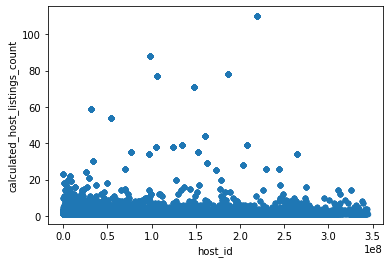

In [0]:

df.plot.scatter('host_id', 'calculated_host_listings_count');

### **Q1. How many variables and how many entries does the data set have? What are the variables types?**

There are 16 variables (columns) and 28.201 entries which types are int, string and float.

This *dataset* is the sum up version downloaded from *listings.csv* file. There are a complete version which contains bigger data than this one.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 28201
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
last_review                        object
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Does the *dataset* have null value? What's percentage?**

Compared to the total entries, this *dataset* has insignificants null values. The columns 'Last_review', 'Host_name' and 'Name' present less than 0,1% for null values  

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                       0.150881
host_name                         0.000106
name                              0.000071
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews_ltm             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. What is the type of distribution of the variables??** 

Histogram first version (raw data)

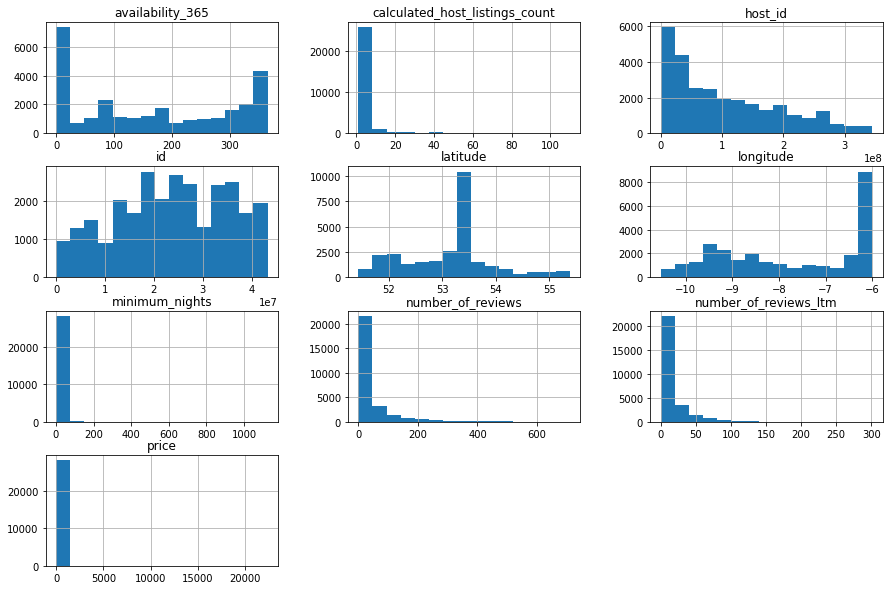

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

**Q4. Are there any Outliers?**

The histrogram above displays that there are evidences of the outliers. The variables price, minimum_nights and calculated_host_listings_count have distorted values.

In this case, it's possible to use the function *df_describe* which display the sum up statistic of variables and helps to detect outliers. 


In [0]:
[ ] # ver o resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,availability_365
count,28201.000000,28201.000000,28201.000000,28201.000000,28201.000000,28201.000000
mean,114.980284,2.916989,37.535903,12.987412,4.694904,166.407822
std,224.427282,13.416049,63.893351,19.809832,12.055973,134.861354
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.000000,1.000000,2.000000,0.000000,1.000000,19.000000
50%,80.000000,2.000000,12.000000,5.000000,2.000000,159.000000
75%,120.000000,2.000000,43.000000,17.000000,3.000000,306.000000
max,22337.000000,1125.000000,710.000000,301.000000,110.000000,365.000000




Now, the histograms were cleaned from outliers, is possible to see clearly the distribution. 


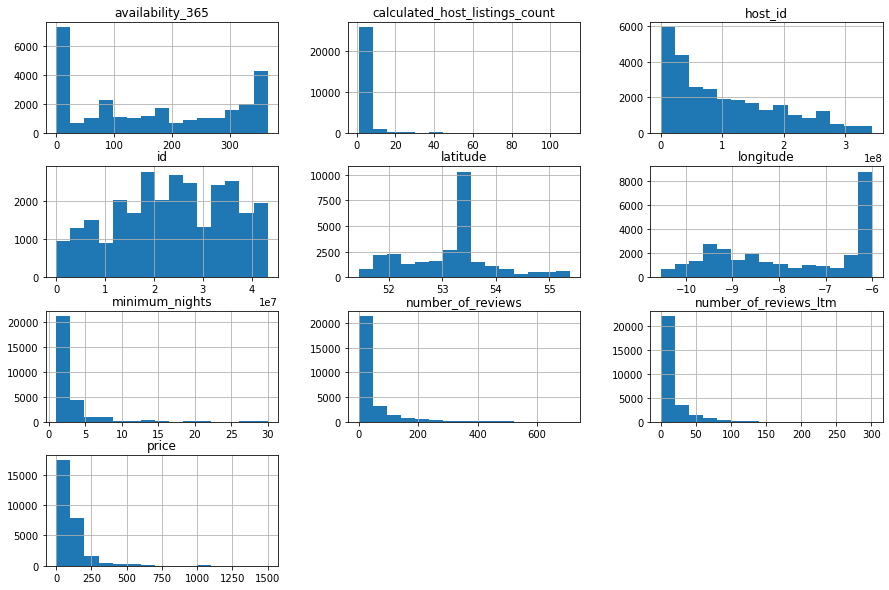

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [0]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,availability_365
count,28056.000000,28056.000000,28056.000000,28056.000000,28056.000000,28056.000000
mean,109.487881,2.402374,37.636085,13.027481,4.688908,166.395495
std,110.779732,2.893097,63.983874,19.809916,12.062117,134.842936
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.000000,1.000000,2.000000,0.000000,1.000000,19.000000
50%,80.000000,2.000000,12.000000,5.000000,2.000000,159.000000
75%,120.000000,2.000000,43.000000,17.000000,3.000000,306.000000
max,1500.000000,30.000000,710.000000,301.000000,110.000000,365.000000


### **Q5. What is the correlation between the variables?**

Correlation means that there is a relationship between two or more variables.

This relationship can be measured, and it is a function of the correlation coefficient to establish its intensity. 

To identify the correlations between the variables bellow, we use the functions:

* Create a correlation matrix
* Generate a heatmap from this matrix, using the *seaborn* library

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm',
'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,availability_365
price,1.000000,0.087019,-0.094045,-0.087798,0.072113,0.025278
minimum_nights,0.087019,1.000000,-0.075651,-0.110490,-0.017007,-0.073453
number_of_reviews,-0.094045,-0.075651,1.000000,0.786796,-0.083188,0.062467
number_of_reviews_ltm,-0.087798,-0.110490,0.786796,1.000000,-0.084437,0.064936
calculated_host_listings_count,0.072113,-0.017007,-0.083188,-0.084437,1.000000,0.144185
availability_365,0.025278,-0.073453,0.062467,0.064936,0.144185,1.000000


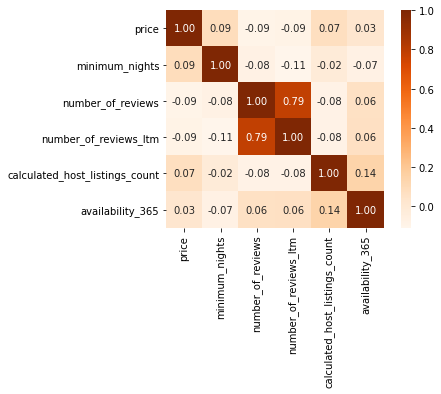

In [0]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='Oranges', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. What type of accommodation is most rented on Airbnb? and what is average price??**

Airbnb offers options to rent such as the entire home/apartament, privade or shared room or Hotel room. 
With the function *df_clean.groupby* is possible to check the quantity and the average price by room_type offered in Ireland 

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    15503
Private room       11938
Hotel room           366
Shared room          249
Name: room_type, dtype: int64

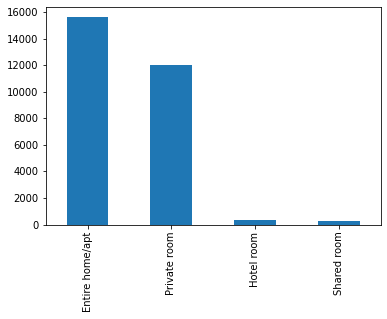

In [0]:
  df['room_type'].value_counts().plot.bar();

In [0]:
# mostrar o valor do aluguel por cada tipo de imóvel disponível
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    141.815004
Hotel room         133.273224
Private room        68.076311
Shared room         47.232932
Name: price, dtype: float64

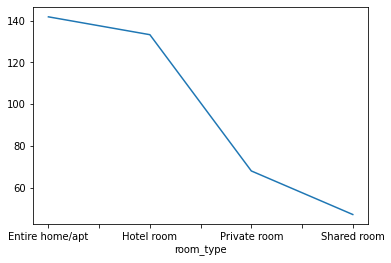

In [0]:
df_clean.groupby(['room_type']).price.mean().plot();

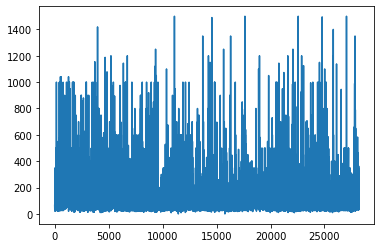

In [0]:
#range of price 

df_clean['price'].plot();

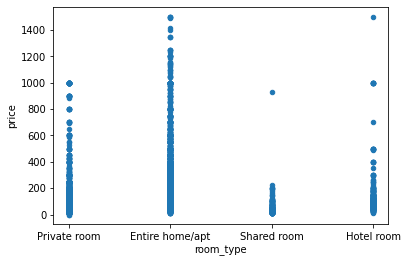

In [0]:
# scatter plot by room_type and price.

df_clean.plot.scatter('room_type','price');

### **Q7. What is the most expensive location in the data set? What is the number of accommodations per city??**



Using the same function *df_clean.groupby* to identify the expensive city in Ireland scored in this *dataset*

Dublin City is the most popular and touristic city in Ireland which should have scored in first most expensive city 
County Louth is a city bounded by Northern Ireland and the Irish Sea. 



In [0]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Louth County Council                     137.296636
Dublin City Council                      133.990651
Kilkenny County Council                  122.742291
Galway City Council                      118.732174
Dun Laoghaire-rathdown County Council    116.848008
Kerry County Council                     109.535813
Waterford City And County Council        108.893657
Cork County Council                      106.494211
Tipperary County Council                 106.352423
Clare County Council                     104.364169
Name: price, dtype: float64

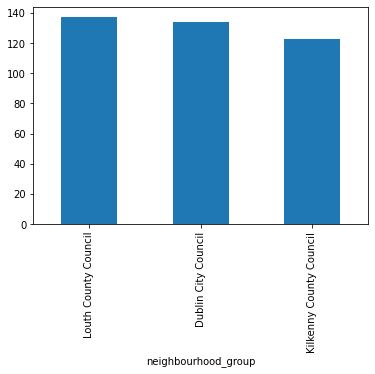

In [0]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:3].plot.bar();

In [0]:
df_clean['price'].mean()

109.48788138009695

In [0]:
# total de imoveis por cidade 
df_clean.groupby(['neighbourhood_group']).calculated_host_listings_count.count().sort_values(ascending=False)[:5]

neighbourhood_group
Dublin City Council       6846
Kerry County Council      2904
Cork County Council       1900
Donegal County Council    1853
Galway County Council     1717
Name: calculated_host_listings_count, dtype: int64

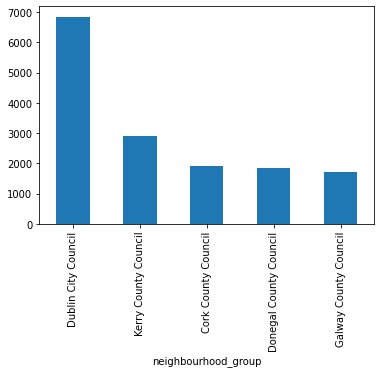

In [0]:
df_clean.groupby(['neighbourhood_group']).calculated_host_listings_count.count().sort_values(ascending=False)[:5].plot.bar();

This *dataset* offers data for longitude and latitute, so its possible to plot a map according its spot

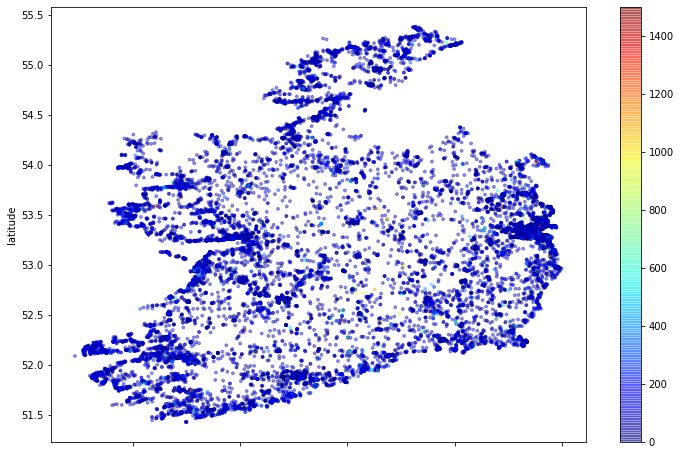

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

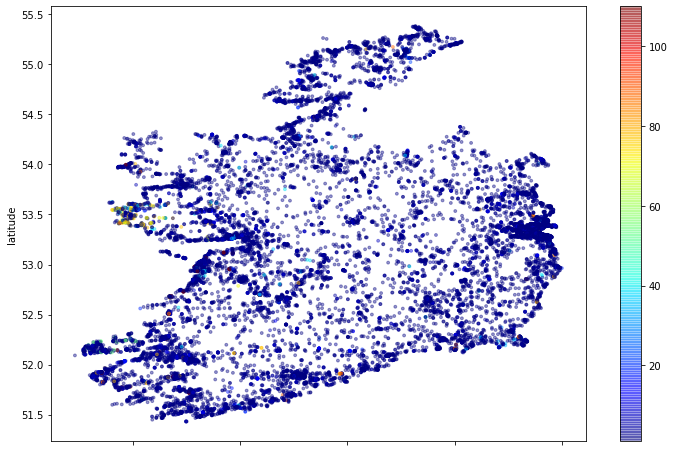

In [0]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['calculated_host_listings_count'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. What is the average minimum rental night? (minimum_nights)**

According to this *dataset* its possible to rent an accomodiation for at average 2 nights

In [0]:
# ver a média da coluna `minimum_nights``

df['minimum_nights'].mean()


2.9169887592638557

## Conclusion


**Listing per Type and City**

Ireland has over 28.900 listings in April 2020 offered to rent out. Breaking this number down into Room type, it brings out that 55% (15.503) described as entire home/ Apt are available to rent out. Less than 1% were listed for a shared room. 

Dublin is the capital, the main city for tourism and business was listed with 6.846 proprieties and represents 36% over the other 31 cities listed on the Airbnb website.

**Price**

This scatter plot shows the distribution of price which look like that has been similar across the country and has no huge discrepancy between areas.

The average price per night is €109,48. Breaking it down for room type the average price for entire home/apt is €141,80, followed by hotel room €133,27, private room €68,07 and €47,23 to rent out a shared room.


**Listing per Hosts**

This dataset brings out that 49% of the hosts have multiple listings. Thes scatter plot shows that some of them have over 50 properties available to rent out and at least 1 of them has over 100.

Airbnb has a note which says "Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, and in violation of most short term rental laws designed to protect residential housing"

There have been a few discussion regarding accommodation in Ireland, specifically Dublin, where there is a shortage of houses for long term rent. Airbnb is a good business for propriety owners, however, it might bring about housing crises issue. This is something to be analyzed more carefully and requires a complete dataset. 

*Airbnb has a note which says "Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, and in violation of most short term rental laws designed to protect residential housing"

There have been a few discussion regarding accommodation in Ireland, specifically Dublin, where there is a shortage of houses for long term rent. Airbnb is a good business for propriety owners, however, it might bring about housing crises issue. This is something to be analyzed more carefully and requires a complete dataset. 


*Currently, I am studying Data Science with @Carlos Melo - Sigmoidal, for each section we have a project to practice the learning.*



